In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import re

In [2]:
# Importo el archivo.

df = pd.read_csv("soccer.csv", engine="python")

# Proviene de  https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

In [3]:
# Muestro los primeros 5 valores.

df.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis SuÃ¡rez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [4]:
# Compruebo las columnas por si hay nombres que puedan dar confusión o mal escritos.

df.columns

Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'],
      dtype='object')

In [5]:
# Miro la información de cada columna para ver que cantidad de datos nulos hay.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                17588 non-null  object 
 1   Nationality         17588 non-null  object 
 2   National_Position   1075 non-null   object 
 3   National_Kit        1075 non-null   float64
 4   Club                17588 non-null  object 
 5   Club_Position       17587 non-null  object 
 6   Club_Kit            17587 non-null  float64
 7   Club_Joining        17587 non-null  object 
 8   Contract_Expiry     17587 non-null  float64
 9   Rating              17588 non-null  int64  
 10  Height              17588 non-null  object 
 11  Weight              17588 non-null  object 
 12  Preffered_Foot      17588 non-null  object 
 13  Birth_Date          17588 non-null  object 
 14  Age                 17588 non-null  int64  
 15  Preffered_Position  17588 non-null  object 
 16  Work

In [6]:
# Elimino los casos NaN (aunque no hay).

df = df.dropna()

In [7]:
# Redefino la variable df para quedarme con las columnas que necesito

# df = df['Name', 'Nationality', 'Club','Club_Position', 'Club_Kit','Rating']

# df

In [8]:
# Veo los elementos de la columna "Rating"

rating = df['Rating']

# Enlista todos los valores

rating.value_counts()

# Ordena los valores registrados

rating.sort_values()

# Veo los valores de "Rating" > 85

rating[rating >= 85]

# Veo los valores de "Rating" > 85 agrupados por "Rating"

rating2 = rating[rating >= 85].value_counts()

rating2.to_frame()

,Rating
86,16
85,13
88,11
89,8
87,7
92,3
90,3
94,1
93,1


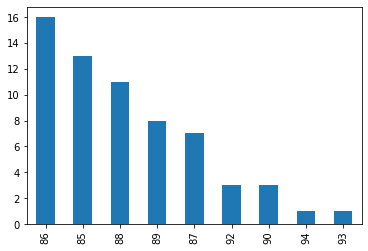

In [9]:
# Gráfica que explica la cantidad de jugadores con un rating > 85.

rating2.sort_values().nlargest(10).plot(kind="bar")

In [10]:
rati = df['Rating'].value_counts()
rati[rati < 25]

65    23
63    18
84    17
86    16
64    14
85    13
60    11
62    11
88    11
59    10
58     8
61     8
89     8
87     7
90     3
55     3
92     3
53     2
54     2
52     2
56     1
57     1
93     1
94     1
Name: Rating, dtype: int64

In [11]:
rati.index.sort_values()



Int64Index([52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
            86, 87, 88, 89, 90, 92, 93, 94],
           dtype='int64')

In [12]:
oms = df[df['Rating'] > 85]

oms

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis SuÃ¡rez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,...,12,21,19,40,13,86,88,87,85,90
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,...,82,77,76,81,86,8,15,12,6,10
7,Gareth Bale,Wales,RS,11.0,Real Madrid,RW,11.0,09/02/2013,2022.0,90,...,90,86,85,76,76,5,15,11,15,6
9,Thibaut Courtois,Belgium,GK,1.0,Chelsea,GK,13.0,07/26/2011,2019.0,89,...,17,19,11,27,12,86,84,69,91,89
10,JÃ©rÃ´me Boateng,Germany,RCB,17.0,FC Bayern,Sub,17.0,07/14/2011,2021.0,89,...,58,56,31,46,53,6,7,15,12,5


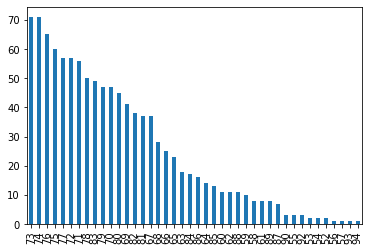

In [13]:
rati.plot(kind="bar")


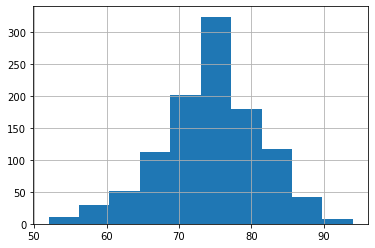

In [15]:
df['Rating'].hist()

In [17]:
ratt = df['Rating'] > 85


In [26]:
club = df['Nationality'].unique()

club

array(['Portugal', 'Argentina', 'Brazil', 'Uruguay', 'Germany', 'Spain',
       'Poland', 'Wales', 'Belgium', 'France', 'Chile', 'Italy',
       'Slovenia', 'Colombia', 'Netherlands', 'Austria', 'England',
       'Denmark', 'Greece', 'Turkey', 'Ivory Coast', 'Switzerland',
       'Egypt', 'Republic of Ireland', 'Mexico', 'Ecuador', 'Finland',
       'Venezuela', 'Russia', 'Norway', 'Sweden', 'United States',
       'Canada', 'Czech Republic', 'Cameroon', 'Northern Ireland',
       'Paraguay', 'Romania', 'Peru', 'Australia', 'Bulgaria', 'Hungary',
       'Scotland', 'South Africa', 'Bolivia', 'China PR', 'India'],
      dtype=object)

In [32]:
df.['Nationality'].value_counts()

SyntaxError: invalid syntax (<ipython-input-32-d2f4eef6a02b>, line 1)

In [30]:
# Quedarme con las columnas que me interesan

df_clean = df[["Name","Nationality","Club","Club_Kit","Rating"]]

df_clean

,Name,Nationality,Club,Club_Kit,Rating
0,Cristiano Ronaldo,Portugal,Real Madrid,7.0,94
1,Lionel Messi,Argentina,FC Barcelona,10.0,93
2,Neymar,Brazil,FC Barcelona,11.0,92
3,Luis SuÃ¡rez,Uruguay,FC Barcelona,9.0,92
4,Manuel Neuer,Germany,FC Bayern,1.0,92
...,...,...,...,...,...
16791,Karanjit Singh,India,Free Agents,99.0,54
16902,Fulganco Cardozo,India,Free Agents,99.0,53
16916,Vinit Rai,India,Free Agents,99.0,53
17113,Chinglensana Singh,India,Free Agents,99.0,52


In [ ]:
df2 = 